# Kmeans

**In this notebook, I will explain how to code K_means with numpy.** 

Let's import the required libraries:

In [14]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

**Kmeans is a clustering technique. You may find the pseudo code of Kmeans:**

K= number of clusters
centroid = center of cluster
X = data
idx = array of idex of centroid assigned to X
    
    Random initialization of centroids
    for iter in range(iterations):   
         # Assign each data point to the closest centroid. 
         idx = find_closest_centroids(X, centroids)
         # Calculate the mean of the data points for each cluster
         centroids = compute_centroids(X, idx, K)

Before starting coding, let's revisit some features of numpy library! 

Here is an example  to assign point to the closest data point. data is the array of data and cent is the list of centroids, they are all 1D:

In [15]:
data = np.array([1,2,3])
cent = np.array([0,2])

assigned_idx = []
for i in data:
    d = (i-cent)**2
    min_d = np.argmin(d)
    assigned_idx.append(min_d)
    
print(assigned_idx)

[0, 1, 1]


**What if we have 2D data?**

In [16]:
data= np.array([[3,2],[1,1],[4,8]])
cent = np.array([[1,1],[0,0]])

data_1 = data[0]
squared_distance = np.sum((data_1 - cent)**2, axis=1)
print('squared distances from data point:', data_1, ' to each centroid is: ', squared_distance[0], 'and', squared_distance[1])

squared distances from data point: [3 2]  to each centroid is:  5 and 13


**Now, we can find the closest centroids:**

In [17]:
def find_closest_centroids(X, centroids):
    """
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
    Returns:
        idx (array_like): (m,) closest centroids
    """
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)

    min_distances = []
    for x in X:
        dist = np.sum((x - centroids)**2, axis=1)
        min_dist_id = np.argmin(dist)
        min_distances.append(min_dist_id)
    idx = np.array(min_distances)
    return idx

**How can we calculate the mean of the data for each cluster?**

Initially, we need to separate the data. Here is an example for this:

In [18]:
# delete the points with axis:
data = np.array([[1,12], [5,13], [6,17], [2,20], [10,30]])
newdata = np.delete(data, 0, axis= 0)
newdata

array([[ 5, 13],
       [ 6, 17],
       [ 2, 20],
       [10, 30]])

In [19]:
# find the data with axis:
data = np.array([[1,12], [5,13], [6,17], [2,20], [10,30]])
assigned_clusters = np.array([0,1,0,1,2])

# find the index of cluster 0
cluster_0_idx = np.where(assigned_clusters == 0)
print(cluster_0_idx)

# find the data assigned to cluster 0
data[cluster_0_idx]

(array([0, 2], dtype=int64),)


array([[ 1, 12],
       [ 6, 17]])

**Let's code the centroid calculation:**

In [20]:
def compute_centroids(X, idx, K):
    """  
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    m, n = X.shape  # m number of data points, n is the features
    centroids = np.zeros((K, n))  # K is the number of clusters 
    
    centroids_list = []
    for k in range(K):
        data_for_k_idx = np.where(idx == k)[0]
        data_for_k = X[data_for_k_idx]     
        cent = np.sum(data_for_k, axis=0) / len(data_for_k)
        centroids_list.append(cent)
        
    centroids = np.array(centroids_list)
    return centroids

In [21]:
# Visualize it: 

def plot_kmeans(X, centroids, idx, i):
    # Plot data
    plt.scatter(X[:, 0], X[:, 1], c=idx)
    # Plot the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
    plt.title("Iteration number %d" %i)

**Complete code:**

In [22]:
def run_kmeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means on data matrix X
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        # print("iteration number:", (i, max_iters-1))
        
        # assign to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        if (plot_progress) and (i%5==0):
            plot_kmeans(X, centroids, idx, i)
        plt.show()
            
        # compute new centroids
        centroids = compute_centroids(X, idx, K)
    return centroids, idx

**Examples:**

In [23]:
# example dataset
X = np.array([[1.8, 4.0], [5.6, 4.7], [6.3, 3], [2.9, 4.6], [3.2, 4.9], [8,6], [9,7], [10,7], [5,5], [4,3], [12,11], 
              [9, 9.5], [4,5], [3,7], [5,6], [14, 8], [1,2], [4, 10], [3,9], [5,7], [4,12], [9,1], [0,1], [3,2], [8,1], 
              [10,3], [6,6], [12,8], [1,1], [12,10]])

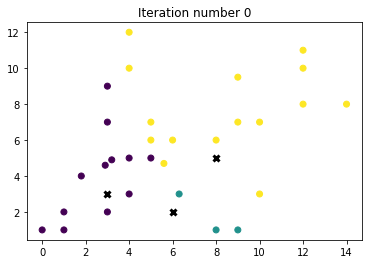

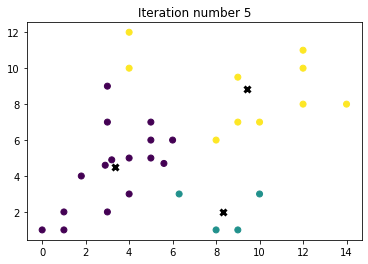

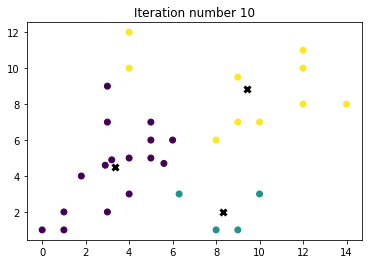

[[3.34375 4.5125 ]
 [8.325   2.     ]
 [9.4     8.85   ]] [0 0 1 0 0 2 2 2 0 0 2 2 0 0 0 2 0 2 0 0 2 1 0 0 1 1 0 2 0 2]


In [24]:
# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = 3

# Number of iterations
max_iters = 11

centroids, idx = run_kmeans(X, initial_centroids, max_iters, plot_progress=True)
print(centroids, idx)

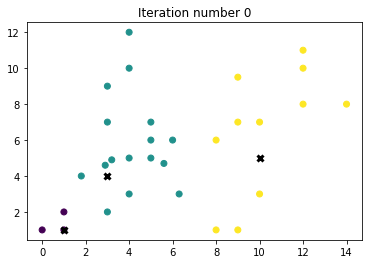

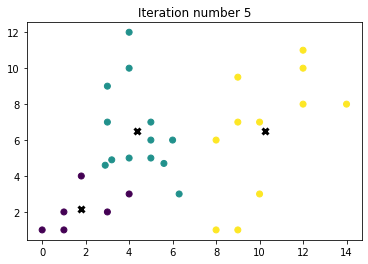

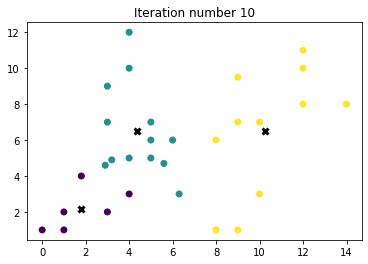

[[ 1.8         2.16666667]
 [ 4.38461538  6.47692308]
 [10.27272727  6.5       ]] [0 1 1 1 1 2 2 2 1 0 2 2 1 1 1 2 0 1 1 1 1 2 0 0 2 2 1 2 0 2]


In [25]:
# If we start with different centroids:

# Set initial centroids
initial_centroids = np.array([[1,1],[3,4],[10,5]])
K = 3

# Number of iterations
max_iters = 11

centroids, idx = run_kmeans(X, initial_centroids, max_iters, plot_progress=True)
print(centroids, idx)

**Note:**

As you can see, different initializations may give us different results. 

Therefore, it is better to randomly initialize the centroids for 100 (example number) times, make the first assignment and calculate the total distance from the inital centroids to the data points, and select the best (which has minimum distance) initial centroid set. 